<h1 style="text-align: center"> Assignment AT2 Part B: Toxic Comment Classification (Group Project Report) </h1>
<h2 style="text-align: right"> Date: 9 May 2023 </h2>

## Group: 26
### Member 1: Savinay Singh <b><u>(Student Id: 24591935)</u></b>
### Member 2: Divgun Singh <b><u>(Student Id: 24586556)</u></b>
### Member 3: Sagar Sudhir Bhagwatkar <b><u>(Student Id: 24613616)</u></b>
### Member 4: Somayeh Amraee <b><u>(Student Id: 14229064)</u></b>


<p style="font-size:18px;">Table of Content
<ol>
    <li>Importing the libraries</li>
    <li>Importing the dataset</li>
    <li>Data Preprocessing</li>
    <ol>
        <li>Check for missing values</li>
        <li>Data Cleaning</li>
        <ul>
                <li>Abbreviation Handling</li>
                <li>Lowercasing the sentences</li>
                <li>Handling the Apostophe</li>
                <li>Handling the numerics</li>
                <li>Removing punctuations</li>
                <li>Removing unicode from string</li>
                <li>Removal of non english alphabets</li>
                <li>Lemmatization</li>
                <li>Spelling correction</li>
                <li>Stopwords removal</li>
                </ul>
        <li>Combined Data preprocessing function</li>
    </ol>
    <li>Data Visualisation</li>
    <li>Vectorization</li>
    <li>Handling the Imbalanced Class</li>
    <li>Classification</li>
    <li>Replacing the toxic words with asterisks</li>
</ol>
</p>

## 1. Importing the libraries

<p style="font-size:18px;"> Libraries are imported to utilise the methods and functions that are pre-embedded in it, extend capabilities of python and solve specific problems. 
</p>

In [3]:
!pip install pyenchant
!apt-get install enchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,316 kB of archives.
After this operation, 5,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main a

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
from tqdm import tqdm
import copy
from nltk.corpus import wordnet
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import words
import pickle
from imblearn.over_sampling import SMOTE 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import collections
import enchant
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## 2. Importing the dataset

<p style="font-size:18px;"> Dataset is a collection of wikipedia comments which have been labeled by human raters for toxic behaviour and are marked into various categories based on the comments. The different categories are:
    <li>Toxic</li>
    <li>Severe_toxic</li>
    <li>Obscene</li>
    <li>Threat</li>
    <li>Insult</li>
    <li>Identity_hate</li>
The dataset consists of 159571 rows with comments in textual format and their categories in a binary format.
</p>

In [5]:
df=pd.read_csv('/content/drive/MyDrive/data_anlp/train.csv')

In [6]:
df_train=df[0:111700]
df_test=df[111700:]

In [7]:
df_train['Toxicity']=df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']].max(axis=1)

<ipython-input-7-3b0b66773912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Toxicity']=df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']].max(axis=1)


In [8]:
df_test['Toxicity']=df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']].max(axis=1)

<ipython-input-8-22fe88db30dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Toxicity']=df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']].max(axis=1)


## 3. Data Preprocessing

<p style="font-size:18px;"> Handling missing values in a crucial step in data pre-processing phase and is termed as the absence of data in one or more features in the dataset. Missing values are handled because of the following reasons:
    <li><b>Data Integrity</b>: Analysing with missing values can compromise results and lead to biased responses.</li>
    <li><b>Model Performance</b>: Missing values can lead the machine learning models to struggle to learn patterns or relationships.</li>
    <li><b>Information Preservation</b>: Analysing without handling missing values can also lead to loss of important and relevant information/insight which can lead to biased results.</li>
    
</p>

### A. Check for missing values

In [9]:
df_train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Toxicity         0
dtype: int64

In [10]:
df_test.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Toxicity         0
dtype: int64

<p style="font-size:18px;"> The following bar plot shows that there is no missing value present in any variable in the dataset.
</p>

In [11]:
# Returns the dictionary with Feature as key and number of missing items as value
def get_nan_vals(df):
    nan_vals = dict(sorted(df.isna().sum().to_dict().items(), key=lambda item: item[1], reverse=True))
    return nan_vals

nan_vals = get_nan_vals(df_train)
X = list(nan_vals.keys())
Y = list(nan_vals.values())
# Plots a bar graph for the missing values in the dataframe
fig = go.Figure(data = go.Bar(x=X, y=Y))
fig.show()

nan_vals = get_nan_vals(df_test)
X = list(nan_vals.keys())
Y = list(nan_vals.values())
# Plots a bar graph for the missing values in the dataframe
fig = go.Figure(data = go.Bar(x=X, y=Y))
fig.show()


### B. Data Cleaning

<p style="font-size:18px;"> Removing ID column because it is just an identifier for each data point and do not carry any useful information for modeling
</p>

In [9]:
df_train=df_train.drop('id',axis=1)
train_sentences=list(df_train.comment_text)

In [10]:
df_test=df_test.drop('id',axis=1)

#### • Abbreviation Handling

<p style="font-size:18px;"> Abbreviations are shortened forms of english words or phrases created by joining initial letters of each word. Abbreviation handling refers to expanding these shortened forms into elaborated meaningful words and ensuring consistency and clarity in communication. Abbreviations are handled for below mentioned reasons:
    <li><b>Understanding and Interpretation:</b> It helps improves understanding and interpretation of text even to the people who are unaware of the abbreviations used.</li>
    <li><b>Data consistency:</b> To ensure uniformity and accuracy of the words abbreviations are handling consistently in the datasets.</li>
    <li><b>Accuracy of results:</b> Abbreviations can hinder with the results of text mining, sentiment analysis, information extraction and other NLP tasks so abbreviation handling is a crucial part.</li>
</p>

In [11]:
# create a dictionary object for the English language
english_dict = enchant.Dict("en_US")

#joining sentences to form a string
my_string = ' '.join(train_sentences)

# split the string into words
words = my_string.split()

# filter out words that are not capitalized or have a length greater than 5
capital_non_english_words = [word for word in words if word.isupper() and len(word) <= 5]

In [12]:
# filter out words that are not in the English dictionary
non_english_words = [word.upper() for word in capital_non_english_words if not english_dict.check(word)]

# print the resulting list of non-English capitalized words with length <= 5
print(non_english_words)

['FAC.', '(UTC)', 'GFDL.', 'WP?', '""A', 'A1.', 'A2.', 'B1.', 'B2.', '(UTC)', 'DSM', '(UTC)', 'TFD', 'WW2,', 'ASS,', 'DRY!', 'NPV', 'BI,', '""A', 'NOW!', 'GAN.', 'ABN', 'AMRO', '(UTC)', 'GW', 'A.I.', 'A,', 'B,', 'A->B,', '""B""', 'A->B', '""A""', '""B""', 'A->B', '""IQ', 'IQ.""', '(UTC)', 'PAARK', 'PAARK', '(I', '(UTC)', 'ℳ', 'Á', 'Ć', 'É', 'Í', 'Ĺ', 'Ń', 'Ó', 'Ŕ', 'Ś', 'Ú', 'Ý', 'Ź', 'À', 'È', 'Ì', 'Ò', 'Ù', 'Â', 'Ĉ', 'Ê', 'Ĝ', 'Ĥ', 'Î', 'Ĵ', 'Ô', 'Ŝ', 'Û', 'Ŵ', 'Ŷ', 'Ä', 'Ë', 'Ï', 'Ö', 'Ü', 'Ÿ', 'Ã', 'Ẽ', 'Ĩ', 'Ñ', 'Õ', 'Ũ', 'Ỹ', 'Ç', 'Ģ', 'Ķ', 'Ļ', 'Ņ', 'Ŗ', 'Ş', 'Ţ', 'Đ', 'Ů', 'Ǎ', 'Č', 'Ď', 'Ě', 'Ǐ', 'Ľ', 'Ň', 'Ǒ', 'Ř', 'Š', 'Ť', 'Ǔ', 'Ž', 'Ā', 'Ē', 'Ī', 'Ō', 'Ū', 'Ȳ', 'Ǣ', 'Ă', 'Ĕ', 'Ğ', 'Ĭ', 'Ŏ', 'Ŭ', 'Ċ', 'Ė', 'Ġ', 'İ', 'Ż', 'Ą', 'Ę', 'Į', 'Ǫ', 'Ų', 'Ḍ', 'Ḥ', 'Ḷ', 'Ḹ', 'Ṃ', 'Ṇ', 'Ṛ', 'Ṝ', 'Ṣ', 'Ṭ', 'Ł', 'Ő', 'Ű', 'Ŀ', 'Ħ', 'Ð', 'Þ', 'Œ', 'Æ', 'Ø', 'Å', 'Ə', 'Ά', 'Έ', 'Ή', 'Ί', 'Ό', 'Ύ', 'Ώ', 'Α', 'Β', 'Γ', 'Δ', 'Ε', 'Ζ', 'Η', 'Θ', 'Ι', 'Κ', 'Λ', 'Μ', 'Ν', 'Ξ', 'Ο', 'Π', 'Ρ', 'Σ

In [13]:
stop_words=stopwords.words('english')

words_after_stopwords_removed=[' '.join([word for word in x.split() if word not in stop_words]) for x in non_english_words]

<p style="font-size:18px;"> Words present in only 1% of the whole data so handling top 10 most frequent words
</p>

In [ ]:
# Split the text into words and count their occurrences
word_counts = Counter(words_after_stopwords_removed)

# Find the total number of words
total_words = sum(word_counts.values())

# Find the set of words that occur in at least 90% of the data
common_words = set(word for word, count in word_counts.items() if count / total_words >= 0.01)

# Filter the word counts to only include common words
common_word_counts = {word: count for word, count in word_counts.items() if word in common_words}

# Print the common words and their occurrences
for word, count in common_word_counts.items():
    print(f'{word}: {count}')

(UTC): 4034
(I: 962
POV: 1440
NPOV: 640
""I: 482
U.S.: 545


In [ ]:
# Sort the frequency distribution in descending order
sorted_freq_dist = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 most common words
top_20_words = sorted_freq_dist[:20]

# creating a dictionary
word_dict = {}

# Print the top 20 most common words and their counts
for word, count in top_20_words:
    print(f'{word}: {count}')
    word_dict[word] = count

(UTC): 4034
POV: 1440
(I: 962
NPOV: 640
U.S.: 545
""I: 482
NOOBS: 454
YOU,: 367
FGGT!: 364
UP!: 356
OK,: 348
POV.: 346
3RR: 299
ANI: 268
BLP: 263
DYK: 255
BTW,: 227
I,: 217
POV,: 209
"I: 194


<Figure size 1000x600 with 0 Axes>

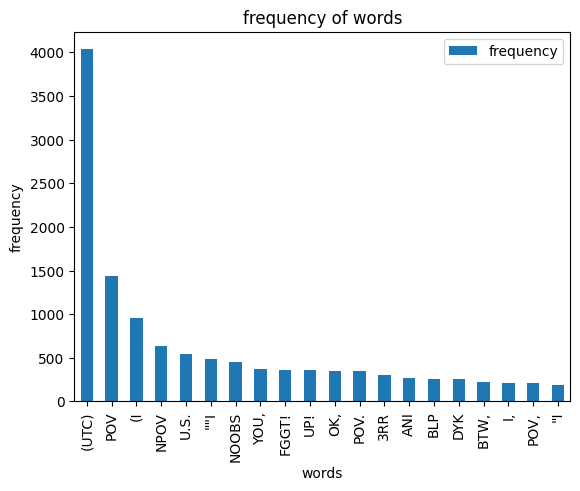

In [ ]:
# convert the dictionary to a Pandas DataFrame
df_word_freq = pd.DataFrame.from_dict(word_dict, orient='index', columns=['frequency'])

# sort the DataFrame by frequency in descending order and select the top 20 rows
df_top_words = df_word_freq.sort_values('frequency', ascending=False).head(20)

# Set the figure size
plt.figure(figsize=(10, 6))

# Add axis labels and a title
df_top_words.plot.bar()
plt.title('frequency of words')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

In [ ]:
# Predefined dictionary of abbreviations
abbrev_dict = {
    'UTC': 'universal time coordinated',
    'POV': 'point of view',
    'LOL': 'laught out loud',
    'NPOV': 'neutral point of view',
    'U.S.': 'united states',
    'ANI': 'asian news international',
    'DONT': 'do not',
    'NOOBS': 'newcomer',
    'BLP': 'beer lovers party',
    'DYK': 'did you know',
    'BTW': 'by the way',
    '3RR': 'three revert rule'
}

 

In [ ]:
# Replacing the abbreviations in the sentences with their respective full forms
l=copy.deepcopy(train_sentences)
for x in tqdm(range(0,len(train_sentences))):
    for d in abbrev_dict.keys():
        l[x]=re.sub('(?:^|\W){}(?:$|\W)'.format(d),' '+abbrev_dict[d]+' ',l[x])

100%|██████████| 111700/111700 [00:29<00:00, 3740.71it/s]


In [ ]:
train_sentences=l.copy()

#### • Lowercasing the sentences

<p style="font-size:18px;"> Lowercasing the sentences to maintain uniformity
</p>

In [ ]:
train_sentences=[x.lower() for x in train_sentences]

#### • Handling the Apostophe

<p style="font-size:18px;"> Many words in the text have apostophe present such as "won't" and they should be converted into their root form i.e. "would not" because after removing the punctuations, most language models would not understand words like "wont"
</p>

In [ ]:
number_sent_apostophe=len([x for x in train_sentences if "'" in x])

In [ ]:
print("Percentage of sentences with apostophe is: ",number_sent_apostophe/len(train_sentences)*100,"%")

Percentage of sentences with apostophe is:  48.5076096687556 %


In [ ]:
# Converting the words having apostophe into their root form
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"there\'s", "there is", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)
    phrase = re.sub(r"he\'s", "he is", phrase)
    phrase = re.sub(r"she\'s", "she is", phrase)
    phrase = re.sub(r"how\'s", "how is", phrase)
    phrase = re.sub(r"let\'s", "let is", phrase)
    phrase = re.sub(r"so\'s", "so is", phrase)
    phrase = re.sub(r"what\'s", "what is", phrase)
    phrase = re.sub(r"when\'s", "when is", phrase)
    phrase = re.sub(r"where\'s", "where is", phrase)
    phrase = re.sub(r"why\'s", "why is", phrase)
  
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
train_sentences=[decontracted(x) for x in train_sentences]

In [ ]:
number_sent_apostophe=len([x for x in train_sentences if "'" in x])
print("Percentage of sentences with apostophe is: ",number_sent_apostophe/len(train_sentences)*100,"%")

Percentage of sentences with apostophe is:  21.399283795881825 %


#### • Handling the numerics

<p style="font-size:18px;"> Numerics are removed from the text because presence of numbers can add noise to the data and make it harder to extract meaningful insights.
</p>

In [ ]:
train_sentences=[re.sub(r"\d", "",s) for s in train_sentences]

#### • Removing punctuations

<p style="font-size:18px;"> Punctuation frequently doesn't contribute value or meaning to the NLP model, so they are removed from the text (Rastogi, 2022)
</p>

In [ ]:
# removal of \n
train_sentences=[re.sub(r"\n", " ",s) for s in train_sentences]

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i if i not in string.punctuation else ' ' for i in text ])
    return punctuationfree
train_sentences=[remove_punctuation(f) for f in train_sentences]

#### • Removing unicode from string

<p style="font-size:18px;"> Unicode characters that do not contribute to the meaning of the text can add noise to the data and reduce the accuracy of the models or algorithms. Removing these characters can help to clean the data and improve the performance of the models or algorithms.
</p>

In [ ]:
train_sentences=[s.encode('ascii', 'ignore').decode() for s in train_sentences]

#### • Removal of non english alphabets

<p style="font-size:18px;"> We are interested in analyzing the text for English language features, such as grammar or vocabulary, so it is necessary to ensure that the corpus only contains english words
</p>

In [ ]:
english_alphabets = re.compile(r'[a-zA-Z]+')

# Filter out non-English words from each sentence in the text list
cleaned_text_list = []
for sentence in train_sentences:
    english_words = []
    for word in sentence.split():
        match = english_alphabets.match(word)
        if match:
            english_words.append(word)
    cleaned_text = ' '.join(english_words)
    cleaned_text_list.append(cleaned_text)

In [ ]:
train_sentences=cleaned_text_list.copy()

#### • Lemmatization

<p style="font-size:18px;"> Further, the sentences are lemmatised to analyse inflected forms of words as a single item. Here we are explicitly specifying the pos tag for each verb because the default pos tag for WordNet Lemmatizer is NOUN and it would not work properly for some VERBS
</p>

In [ ]:
def lemmatize_text(preprocessed_text):
    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        # print(tag)
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    # 1. Init Lemmatizer
    lemmatizer = WordNetLemmatizer()
   # 2. Lemmatize a Sentence with the appropriate POS tag
    lemmatized_text=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(preprocessed_text)]
    # The final processed set of words for each iteration will be stored in 'text_final'
    text_final=(" ".join( lemmatized_text ))
    return text_final

In [ ]:
ans=[]
for x in tqdm(train_sentences,total=len(train_sentences)):
    ans.append(lemmatize_text(x))

100%|██████████| 111700/111700 [18:08<00:00, 102.61it/s]


In [ ]:
train_sentences=ans.copy()

#### • Stopwords removal

<p style="font-size:18px;"> The stop words are removed from the text to ensure the removal of low-level information (Khanna, 2021).
</p>

In [ ]:
stop_words=stopwords.words('english')
train_sentences=[' '.join([word for word in x.split() if word not in stop_words]) for x in train_sentences]

### C. Combined Data Pre-processing Function

<p style="font-size:18px;"> The combined function is a mix of all the sub-functions used in data cleaning to perform the whole data pre-processing by few lines of code.
</p>

In [ ]:
# Combined Data Cleaning function
def preprocessing(sentences):
    # Abbreviation Handling
    l=copy.deepcopy(sentences)
    for x in tqdm(range(0,len(sentences))):
        for d in abbrev_dict.keys():
            l[x]=re.sub('(?:^|\W){}(?:$|\W)'.format(d),' '+abbrev_dict[d]+' ',l[x])
    # Lowercasing
    sentences=[x.lower() for x in sentences]
    # Handling apostophe
    sentences=[decontracted(x) for x in sentences]
    # Handling numerics
    sentences=[re.sub(r"\d", "",s) for s in sentences]
    # Removing punctuations
    sentences=[re.sub(r"\n", " ",s) for s in sentences]
    sentences=[remove_punctuation(f) for f in sentences]
    # Removing unicodes from strings 
    sentences=[s.encode('ascii', 'ignore').decode() for s in sentences]
    # Removal of non-english alphabets
    english_alphabets = re.compile(r'[a-zA-Z]+')
    cleaned_text_list = []
    for sentence in sentences:
        english_words = []
        for word in sentence.split():
            match = english_alphabets.match(word)
            if match:
                english_words.append(word)
        cleaned_text = ' '.join(english_words)
        cleaned_text_list.append(cleaned_text)
    sentences=cleaned_text_list.copy()
    #  Lemmatization
    ans=[]
    for x in tqdm(sentences,total=len(sentences)):
        ans.append(lemmatize_text(x))
    sentences=ans.copy()   
    # Stop word removal
    sentences=[' '.join([word for word in x.split() if word not in stop_words]) for x in sentences]
    return sentences

In [ ]:
test_sentence=list(df_test.comment_text)

In [ ]:
test_sentence=preprocessing(test_sentence)

100%|██████████| 47871/47871 [07:27<00:00, 107.06it/s]


In [ ]:
pickle.dump(train_sentences, open('/content/drive/MyDrive/data_anlp/post_lemmaTrain.pkl','wb'))
pickle.dump(test_sentence, open('/content/drive/MyDrive/data_anlp/post_lemmaTest.pkl','wb'))

In [14]:
train_sentences = pickle.load(open('/content/drive/MyDrive/data_anlp/post_lemmaTrain.pkl','rb'))
test_sentence = pickle.load(open('/content/drive/MyDrive/data_anlp/post_lemmaTest.pkl','rb'))


In [15]:
df_train['comment_text_cleaned']=train_sentences

In [16]:
df_test['comment_text_cleaned']=test_sentence

## 4. Data Visualisation

<p style="font-size:18px;"> 
The histogram presented below indicates that over 90% of the comments have a length of less than 200 words.
</p>

In [17]:
df['comment_text_cleaned']=list(pd.Series(train_sentences).append(pd.Series(test_sentence)))

<ipython-input-17-2abac18ed92c>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['comment_text_cleaned']=list(pd.Series(train_sentences).append(pd.Series(test_sentence)))


In [18]:
df['Comment_length']=[len(x.split()) for x in df.comment_text_cleaned]

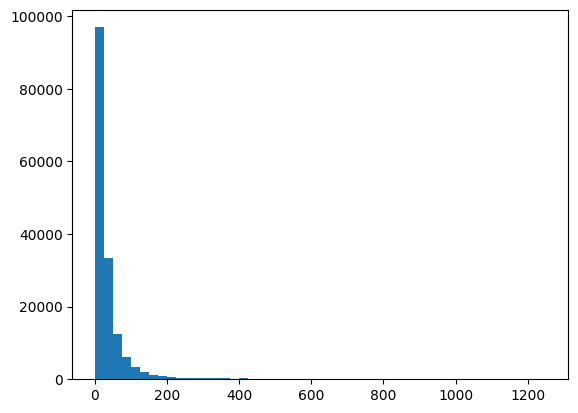

In [19]:
plt.hist(df['Comment_length'], bins=50)
plt.show()

In [ ]:
df['Toxicity']=df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']].max(axis=1)

<p style="font-size:18px;"> The box plot below show that there is no correlation between the toxicity and length of comments
</p>

<Axes: xlabel='Toxicity', ylabel='Comment_length'>

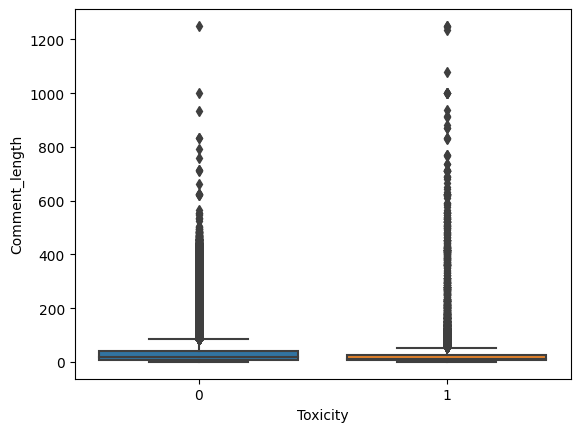

In [ ]:
sns.boxplot(x='Toxicity', y='Comment_length', data=df)

<p style="font-size:18px;"> The bar chart presented below illustrates the distribution of target classes, indicating an imbalance in their distribution.
</p>

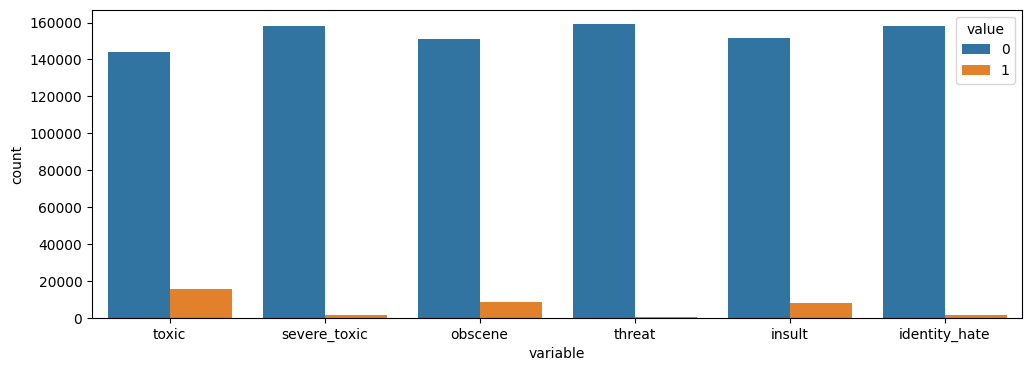

In [ ]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# plot the chart out for better visualization
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(df[class_names]))
plt.show()

In [ ]:
sid = SentimentIntensityAnalyzer()
df['Sentiment_scores'] = df['comment_text'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
df['sentiment_label'] = df['Sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0.05 else ('negative' if x['compound'] <= -0.05 else 'neutral'))

<p style="font-size:18px;"> In order to determine the frequency of each sentiment, we are creating a bar graph. The positive comments out number the negative and neutral remarks, as can be observed.
</p>

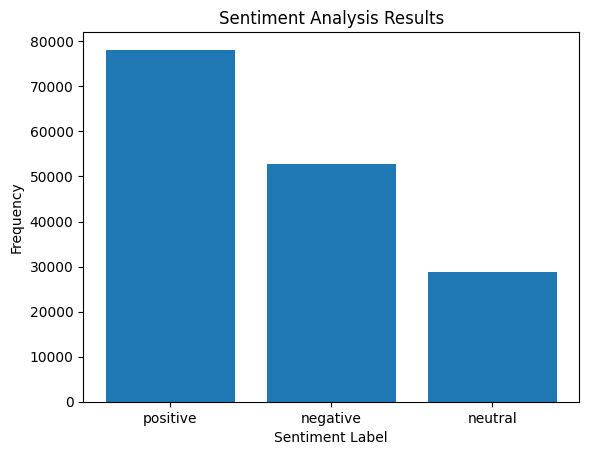

In [ ]:
# Count the frequency of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a bar plot of the sentiment labels
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()

In [ ]:
text1=' '.join(df[df.sentiment_label=='positive'].comment_text)
text2=' '.join(df[df.sentiment_label=='negative'].comment_text)
text3=' '.join(df[df.sentiment_label=='neutral'].comment_text)

<p style="font-size:18px;"> Sentiment analysis is a technique used to determine the overall sentiment of a text, typically by classifying the text as positive, negative, or neutral based on the words and phrases used. While this approach may be useful in certain applications, it may not always provide a complete picture of the text's meaning. As can be seen from the word cloud, sentiment analysis may miss relevant words or phrases that are important for a more nuanced analysis of the text. Therefore, it is important to carefully consider the goals of the analysis and choose appropriate techniques that can provide a more comprehensive understanding of the text.
</p>

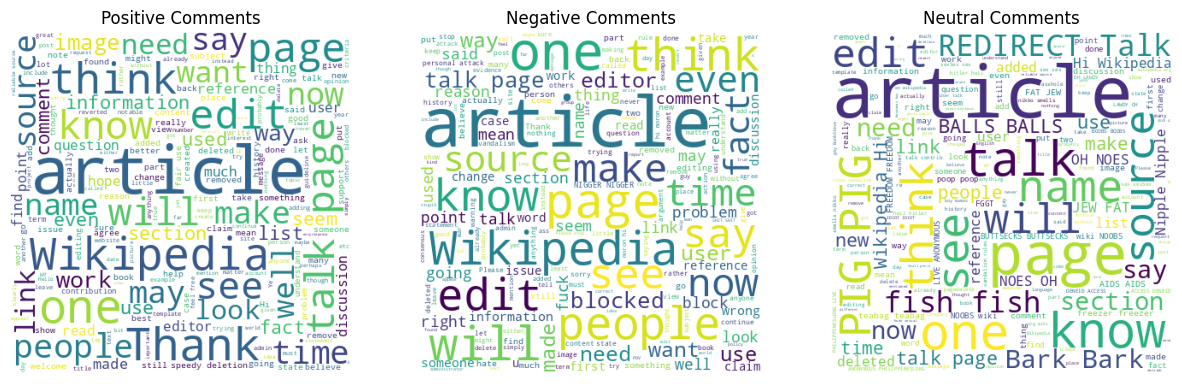

In [ ]:
# Generate the word cloud objects
wordcloud1 = WordCloud(width=400, height=400, background_color='white').generate(text1)
wordcloud2 = WordCloud(width=400, height=400, background_color='white').generate(text2)
wordcloud3 = WordCloud(width=400, height=400, background_color='white').generate(text3)

# Create a grid of subplots and plot each word cloud in a separate subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(wordcloud1)
axs[0].set_title('Positive Comments')
axs[0].axis('off')
axs[1].imshow(wordcloud2)
axs[1].set_title('Negative Comments')
axs[1].axis('off')
axs[2].imshow(wordcloud3)
axs[2].set_title('Neutral Comments')
axs[2].axis('off')

# Show the plot
plt.show()

In [ ]:
text1=' '.join(df[df.toxic==1].comment_text)
text2=' '.join(df[df.severe_toxic==1].comment_text)
text3=' '.join(df[df.obscene==1].comment_text)
text4=' '.join(df[df.threat==1].comment_text)
text5=' '.join(df[df.insult==1].comment_text)
text6=' '.join(df[df.identity_hate==1].comment_text)

<p style="font-size:18px;"> The word cloud presented below displays the most frequent words associated with the categories of toxic, severe_toxic, obscene, threat, insult, and hate.
</p>

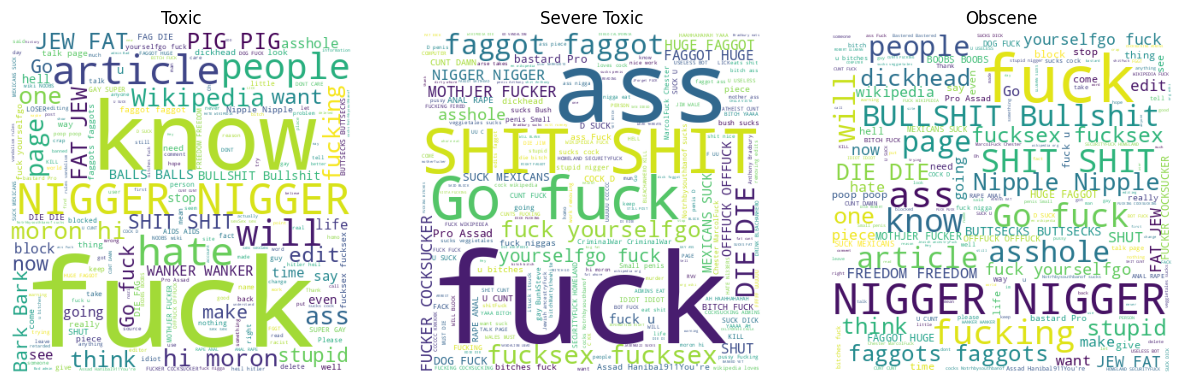

In [ ]:
# Generate the word cloud objects
wordcloud1 = WordCloud(width=400, height=400, background_color='white').generate(text1)
wordcloud2 = WordCloud(width=400, height=400, background_color='white').generate(text2)
wordcloud3 = WordCloud(width=400, height=400, background_color='white').generate(text3)

# Create a grid of subplots and plot each word cloud in a separate subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(wordcloud1)
axs[0].set_title('Toxic')
axs[0].axis('off')
axs[1].imshow(wordcloud2)
axs[1].set_title('Severe Toxic')
axs[1].axis('off')
axs[2].imshow(wordcloud3)
axs[2].set_title('Obscene')
axs[2].axis('off')

# Show the plot
plt.show()

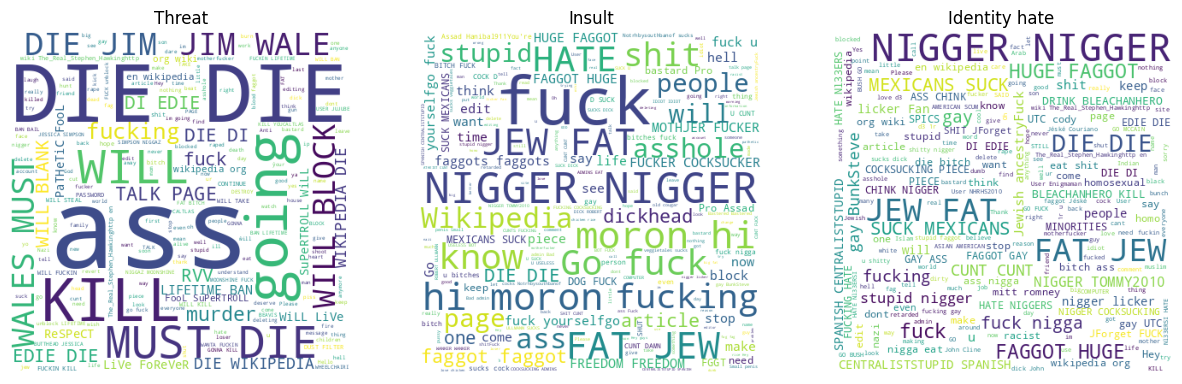

In [ ]:
# Generate the word cloud objects
wordcloud1 = WordCloud(width=400, height=400, background_color='white').generate(text4)
wordcloud2 = WordCloud(width=400, height=400, background_color='white').generate(text5)
wordcloud3 = WordCloud(width=400, height=400, background_color='white').generate(text6)

# Create a grid of subplots and plot each word cloud in a separate subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(wordcloud1)
axs[0].set_title('Threat')
axs[0].axis('off')
axs[1].imshow(wordcloud2)
axs[1].set_title('Insult')
axs[1].axis('off')
axs[2].imshow(wordcloud3)
axs[2].set_title('Identity hate')
axs[2].axis('off')

# Show the plot
plt.show()

In [ ]:
text1=' '.join(df[df.Toxicity==1].comment_text)

In [ ]:
wordcloud1 = WordCloud(width=400, height=400, background_color='white').generate(text1)

<p style="font-size:18px;"> The word cloud presented below displays the most frequent words associated with the aggregation of the categories of toxic, severe_toxic, obscene, threat, insult, and hate.
</p>

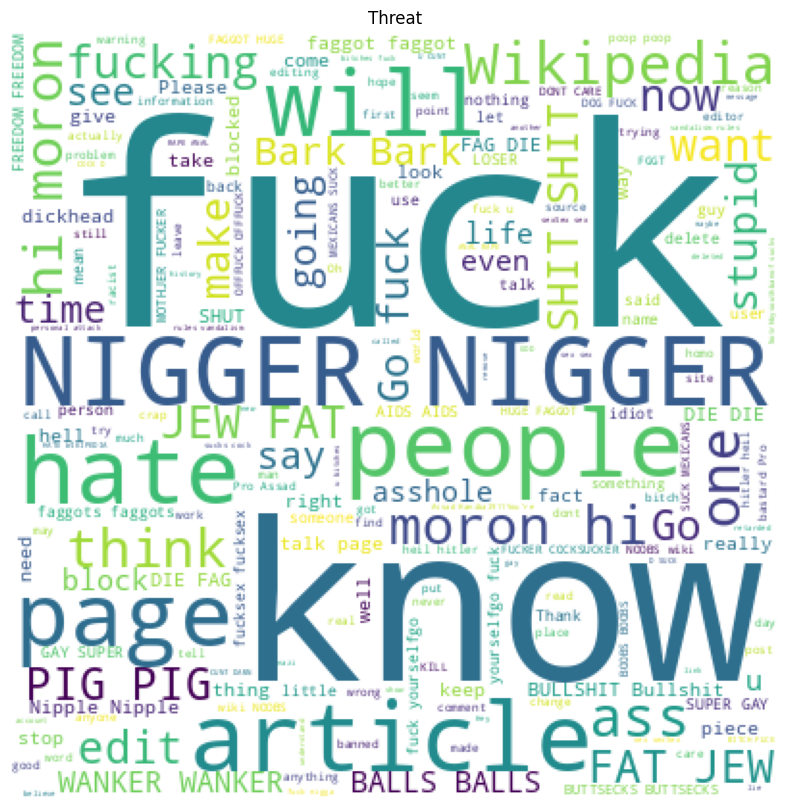

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15, 10))
axs.imshow(wordcloud1)
axs.set_title('Threat')
axs.axis('off')
plt.show()

In [ ]:
text1=' '.join(df[df.Toxicity==1].comment_text_cleaned)

In [ ]:
word_counts = collections.Counter(text1.split())

In [ ]:
most_common_words = word_counts.most_common(50)


In [ ]:
most_common_words

[('fuck', 13573),
 ('suck', 4824),
 ('go', 4324),
 ('like', 3942),
 ('wikipedia', 3921),
 ('shit', 3726),
 ('u', 3467),
 ('nigger', 3432),
 ('get', 3388),
 ('page', 2856),
 ('faggot', 2709),
 ('hate', 2704),
 ('know', 2616),
 ('bitch', 2327),
 ('gay', 2277),
 ('make', 2240),
 ('die', 2219),
 ('article', 2123),
 ('block', 2117),
 ('people', 2113),
 ('fat', 1982),
 ('say', 1973),
 ('moron', 1959),
 ('talk', 1905),
 ('user', 1853),
 ('cunt', 1837),
 ('one', 1772),
 ('edit', 1734),
 ('hi', 1711),
 ('time', 1621),
 ('jew', 1572),
 ('stop', 1572),
 ('want', 1568),
 ('think', 1562),
 ('would', 1529),
 ('dick', 1499),
 ('stupid', 1493),
 ('wiki', 1481),
 ('pig', 1389),
 ('well', 1304),
 ('cock', 1289),
 ('see', 1278),
 ('penis', 1261),
 ('take', 1257),
 ('life', 1255),
 ('idiot', 1209),
 ('delete', 1204),
 ('right', 1186),
 ('asshole', 1171),
 ('bullshit', 1170)]

<p style="font-size:18px;"> The bar plot displays the most commonly occurring words along with their frequency of appearance in toxic sentences.
</p>

In [ ]:
px.bar( x=[x[0] for x in most_common_words], y=[x[1] for x in most_common_words])

## 5. Vectorization

<p style="font-size:18px;"> TF-IDF or Term Frequency-Inverse Document Frequency is  a numerical statistic used to retrive infomration and in text mining to evaluate the weightage and relevance of a word with in a document or a collection of documents. It is a helpful technique as it identifies and prioritises important terms or keywords in a document based on their relevance and discriminative power. TF-IDF is done for several reasons:
    <li><b>Keyword Extraction</b>It identifies and extracts keywords from a phrase with more weightage which tells the importance of the word.</li>
    <li><b>Text Mining and Data Analysis</b>It is done to uncover meaningful patterns and insights in large datasets by identifying trends, extracting significant information and performing EDA on text data.</li>
</p>

In [21]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), 
               min_df=3, max_df=0.9)

In [22]:
train_matrix = vectorizer.fit_transform(train_sentences)

In [23]:
test_matrix = vectorizer.transform(test_sentence)

In [24]:
train_matrix.shape,test_matrix.shape

((111700, 265468), (47871, 265468))

## 6. Handling the Imbalanced Class

<p style="font-size:18px;"> SMOTE stands for Synthetic Minority Over-Sampling Technique used in machine learning and data mining to address class imbalance in datasets. When number of instances in one class is significantly lower than the number of instances in other class it is termed as class imbalance, SMOTE is designed to address this issue by generating synthetic samples of minority class to balance the class distribution. Class imbalance is handled for following reasons:
    <li><b>Biased model performance</b>: When majority class is dominating in the dataset, the model tends to be biased towards the majority class resutling in biased results.</li>
    <li><b>Misrepresentation of minority class</b>: Model tends to have limited expoure to the minority class making it harder to learn patterns and so misrepresents the data and wrong predictions for that class.</li>
</p>

In [25]:
sm = SMOTE(random_state=42)
y_train=df_train.Toxicity
X_train_sm, y_train_sm = sm.fit_resample(train_matrix, y_train)

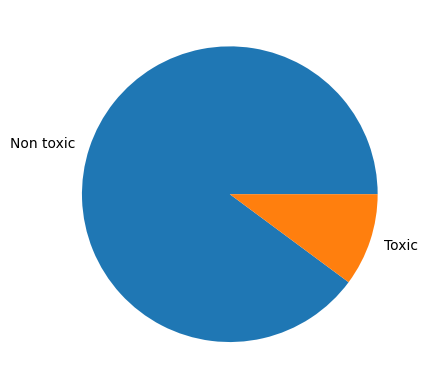

In [ ]:
plt.pie(y_train.value_counts(),labels=['Non toxic','Toxic'])
plt.show()

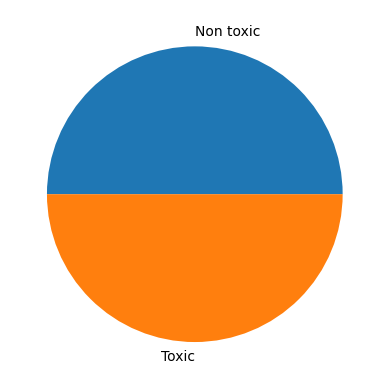

In [ ]:
plt.pie(y_train_sm.value_counts(),labels=['Non toxic','Toxic'])
plt.show()

## 7. Classification

<p style="font-size:18px;"> <li> XGBoost or extreme gradient boosting is a powerful and widely used machine learning algorithm that belongs ot gradient boosting family and is known for its effectiveness and high performance in a variety of machine learning tasks, particularly in structured/tabular data problems. </li>
    <li> XGboost is commonly used in text classification models due to its ability to handle high-dimensional data, effectively capture complex patterns, and provude accurate predictions. </li>
    <li>XGBoost in text classification often involves non-linear relationships between features and the target variable, models complex interactions and non-linearities in an effective way because of a tree-based algorithm. </li>
    <li><b>scale_pos_weight</b> is a parameter to set the ratio of number of negative instances to the number of positive instances in the training data. By adjusting this parameter the impact of positive class and negative class on the model can be controlled. </li>
    <li>In this scenario recall is made higher by manipulating the scale_pos_weight parameter and sacrificing the accuracy so as to not avoid any comment which has toxic words in it. </li>
    
</p>

In [47]:
%%time
# create a XGBoost classifier and train it on resampled data
xgb = XGBClassifier().fit(X_train_sm,y_train_sm)

CPU times: user 8min 34s, sys: 486 ms, total: 8min 35s
Wall time: 5min 8s


In [48]:
# make predicitons on train and test sets
x_pred_xg = xgb.predict(train_matrix)
y_pred_xg= xgb.predict(test_matrix)

In [49]:
# classification report of hypertuned model
print(classification_report(df_test.toxic, y_pred_xg))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     43313
           1       0.48      0.78      0.59      4558

    accuracy                           0.90     47871
   macro avg       0.73      0.84      0.77     47871
weighted avg       0.93      0.90      0.91     47871



In [50]:
# accuracy of model on train and test sets
acc_train_xg = accuracy_score(df_train.toxic, x_pred_xg)
acc_test_xg = accuracy_score(df_test.toxic, y_pred_xg)

In [51]:
print("The accuracy score of XGBoost model on training data is "+str(acc_train_xg)+" and that on testing data is " +str(acc_test_xg))

The accuracy score of XGBoost model on training data is 0.9135541629364369 and that on testing data is 0.8992500678907899


In [41]:
%%time
# create a XGBoost classifier and train it on resampled data
model = XGBClassifier(scale_pos_weight=1.3).fit(X_train_sm,y_train_sm)

CPU times: user 8min 40s, sys: 610 ms, total: 8min 41s
Wall time: 6min 2s


In [42]:
# make predicitons on train and test sets
x_pred_xgb = model.predict(train_matrix)
y_pred_xgb=model.predict(test_matrix)

In [44]:
# classification report of hypertuned model
print(classification_report(df_test.toxic, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     43313
           1       0.43      0.80      0.56      4558

    accuracy                           0.88     47871
   macro avg       0.70      0.85      0.75     47871
weighted avg       0.93      0.88      0.90     47871



In [45]:
# accuracy of model on train and test sets
acc_train_xgb = accuracy_score(df_train.toxic, x_pred_xgb)
acc_test_xgb = accuracy_score(df_test.toxic, y_pred_xgb)

In [52]:
print("The accuracy score of hypertuned XGBoost model on training data is "+str(acc_train_xgb)+" and that on testing data is " +str(acc_test_xgb))

The accuracy score of hypertuned XGBoost model on training data is 0.8957206803939123 and that on testing data is 0.8807837730567567


In [22]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

In [23]:
# Train the classifier
rf_classifier.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [24]:
# Make predictions on the train and test set
x_pred_rf = rf_classifier.predict(train_matrix)
y_pred_rf = rf_classifier.predict(test_matrix)

In [25]:
# Generate the classification report
report_rf = classification_report(df_test.toxic, y_pred_rf)

In [1]:
# Print the classification report
print(report_rf)

NameError: ignored

In [28]:
# accuracy score on training and testing sets
acc_train_rf = accuracy_score(df_train.toxic, x_pred_rf)
acc_test_rf = accuracy_score(df_test.toxic, y_pred_rf)

In [32]:
print("The accuracy score of random forest model on training data is "+str(acc_train_rf)+" and that on testing data is " +str(acc_test_rf))

The accuracy score of random forest model on training data is 0.994243509400179 and that on testing data is 0.9437655365461344


In [34]:
# Initializing Logistic Regression model
lr_model = LogisticRegression()

In [35]:
# Fitting the model on the training data
lr_model.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [36]:
# Making predictions on the training and testing data
x_pred_lr = lr_model.predict(train_matrix)
y_pred_lr = lr_model.predict(test_matrix)

In [37]:
# Generate the classification report
report_lr = classification_report(df_test.toxic, y_pred_lr)

In [38]:
# Print the classification report
print(report_lr)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     43313
           1       0.53      0.83      0.65      4558

    accuracy                           0.92     47871
   macro avg       0.76      0.88      0.80     47871
weighted avg       0.94      0.92      0.92     47871



In [39]:
#accuracy score on training and testing sets
acc_train_lr = accuracy_score(df_train.toxic, x_pred_lr)
acc_test_lr = accuracy_score(df_test.toxic, y_pred_lr)

In [40]:
print("The accuracy score of logistic regression model on training data is "+str(acc_train_lr)+" and that on testing data is " +str(acc_test_lr))

The accuracy score of logistic regression model on training data is 0.9422739480752015 and that on testing data is 0.915021620605377


In [26]:
accuracy_data = {
    'Training': [acc_train_xgb, acc_train_rf, acc_train_lr],
    'Testing': [acc_test_xgb, acc_test_rf, acc_test_lr]
}

In [27]:
# Define the models and sets
models = ['XGBoost', 'Random Forest', 'Logistic Regression']
sets = ['Training', 'Testing']

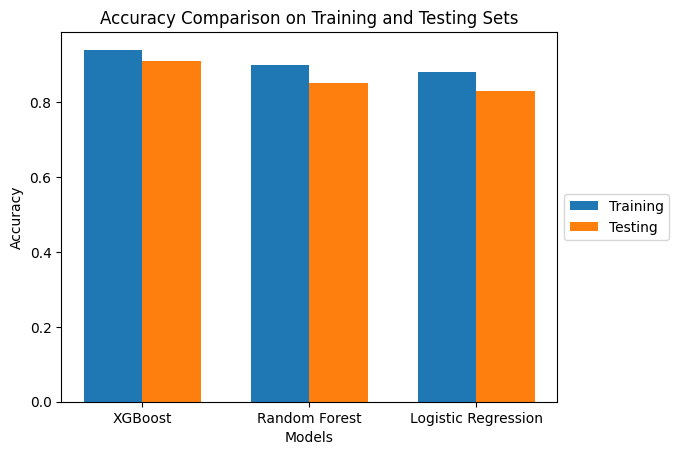

In [28]:
# Define the bar plot dimensions
bar_width = 0.35
index = np.arange(len(models))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the bars
for i, set_name in enumerate(sets):
    ax.bar(index + i * bar_width, accuracy_data[set_name], bar_width, label=set_name)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison on Training and Testing Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

## 8. Replacing the toxic words with asterisks

<p style="font-size:18px;"> By replacing toxic words with asterisks, we can convey the same message without using language that could be considered abusive, discriminatory, or otherwise inappropriate. It is a way of expressing oneself without resorting to harmful language, and it helps to promote a more respectful and inclusive communication culture.

</p>

In [ ]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
df_toxic=df_train.append(df_test)

/var/folders/0h/j84rsdwd49jbw1_d04_c5b3r0000gn/T/ipykernel_20337/3431693096.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_toxic=df_toxic[df_toxic.Toxicity==1]

In [ ]:
vocab=[[w for w in x.split()] for x in df_toxic.comment_text_cleaned]

In [ ]:
vocab = [item for sublist in vocab for item in sublist]


In [ ]:
len(vocab)

461252

In [ ]:
sents=[]
for text in tqdm(vocab,total=len(vocab)):
    sentiment_score = sia.polarity_scores(text)

    # Print sentiment score
    sents.append(sentiment_score)

100%|████████████████████████████████| 461252/461252 [00:07<00:00, 61477.64it/s]


In [ ]:
values=dict(zip(vocab,[x['compound'] for x in sents]))
df_toxic_words=pd.DataFrame(values,index=[0]).T

In [ ]:
df_toxic_words[df_toxic_words[0]<-0.35]

,0
cocksucker,-0.6249
piss,-0.4019
destroy,-0.5423
destructive,-0.6124
brutally,-0.6124
...,...
robber,-0.5574
horrifyingly,-0.6486
problematical,-0.4215
puked,-0.4215


In [ ]:
bad_words=pickle.load(open('./jigsaw-toxic-comment-classification-challenge/bad_words.pkl','rb'))

In [ ]:
correction_dict=dict(zip(bad_words,[x[0]+'*'*(len(x)-1) for x in bad_words]))

<p style="font-size:18px;"> The following is an illustration of how the text's toxic words are eliminated and replaced by asterisks

</p>

In [ ]:
snts=['cocksucker fuck you hard','fuck man',' cocksucker']

In [ ]:
final_snts=[]
for sent in snts:
    for key in correction_dict:
        if key in sent.split():
            sent=re.sub(key,correction_dict[key],sent)
    final_snts.append(sent)

In [ ]:
final_snts

['c********* f*** you hard', 'f*** man', ' c*********']

In [ ]:
final_snts=[]
for sent in tqdm(list(df.comment_text_cleaned),total=len(list(df.comment_text_cleaned))):
    for key in correction_dict:
        if key in sent.split():
            sent=re.sub(key,correction_dict[key],sent)
    final_snts.append(sent)

100%|█████████████████████████████████| 159571/159571 [00:34<00:00, 4626.86it/s]


In [ ]:
df['Censored_sentences']=final_snts

In [ ]:
text1=' '.join(df[df.Toxicity==1].Censored_sentences)

In [ ]:
word_counts = collections.Counter(text1.split())

In [ ]:
most_common_words = word_counts.most_common(50)


In [ ]:
most_common_words

[('f***', 14011),
 ('s***', 8619),
 ('go', 4324),
 ('like', 3942),
 ('wikipedia', 3922),
 ('u', 3467),
 ('n*****', 3432),
 ('get', 3388),
 ('f*****', 3344),
 ('page', 2856),
 ('hate', 2704),
 ('know', 2616),
 ('b****', 2326),
 ('gay', 2277),
 ('make', 2240),
 ('die', 2219),
 ('article', 2123),
 ('block', 2117),
 ('people', 2113),
 ('fat', 1982),
 ('say', 1973),
 ('m****', 1959),
 ('d***', 1952),
 ('talk', 1902),
 ('user', 1853),
 ('c***', 1837),
 ('one', 1772),
 ('edit', 1734),
 ('hi', 1711),
 ('s*****', 1661),
 ('time', 1621),
 ('jew', 1572),
 ('stop', 1572),
 ('want', 1568),
 ('think', 1561),
 ('would', 1529),
 ('wiki', 1481),
 ('pig', 1389),
 ('well', 1304),
 ('cock', 1289),
 ('see', 1278),
 ('penis', 1260),
 ('take', 1257),
 ('life', 1255),
 ('a******', 1229),
 ('idiot', 1209),
 ('delete', 1204),
 ('right', 1186),
 ('even', 1138),
 ('give', 1126)]

<p style="font-size:18px;"> The bar plot displays the most commonly occurring words along with their frequency of appearance in toxic sentences.
</p>

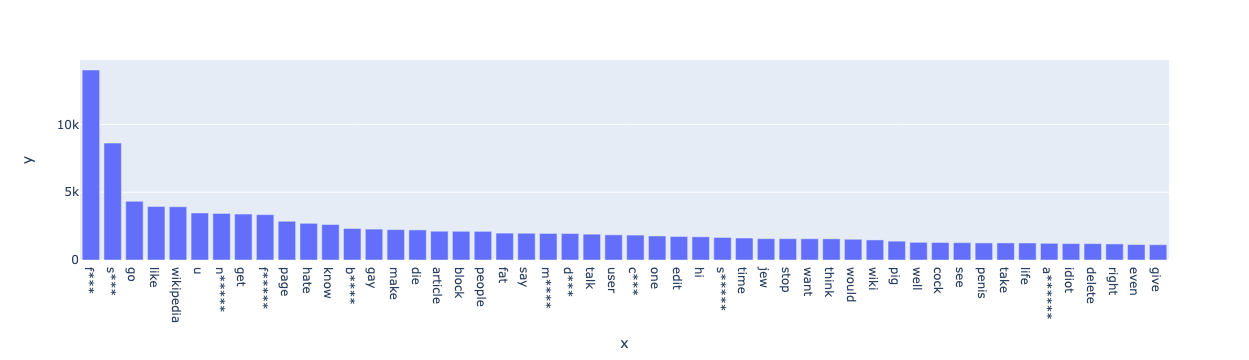

In [ ]:
px.bar(x=[x[0] for x in most_common_words], y=[x[1] for x in most_common_words])